Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

b) any tabular data set (i gave example of iris data set in slides with colab links) \

i) PCA
ii) SVD
iii) LLE
iv) t-SNE
v) ISOMAP
vi) UMAP

# Library imports and util functions

In [324]:
!pip install scprep phate umap-learn umap-learn[plot]

     |████████████████████████████████| 15.8 MB 623 bytes/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 
     |████████████████████████████████| 125 kB 60.2 MB/s 
     |████████████████████████████████| 791 kB 64.2 MB/s 
     |████████████████████████████████| 786 kB 67.5 MB/s 
     |████████████████████████████████| 779 kB 74.9 MB/s 
     |████████████████████████████████| 778 kB 76.6 MB/s 
     |████████████████████████████████| 776 kB 61.0 MB/s 
     |████████████████████████████████| 769 kB 38.7 MB/s 
     |████████████████████████████████| 766 kB 65.3 MB/s 
     |████████████████████████████████| 1.0 MB 30.3 MB/s 
     |████████████████████████████████| 722 kB 28.7 MB/s 
     |████████████████████████████████| 722 kB 38.2 MB/s 
     |████████████████████████████████| 715 kB 49.9 MB/s 
     |████████████████████████████████| 705 kB 66.3 MB/s 
     |████████████████████████████████| 699 kB 67.4 MB/s 
     |████████████████████████████████| 696 kB 58.8 MB/s 
     |███████

In [316]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

import umap

plt.style.use('ggplot')

In [325]:
import umap.plot

In [76]:
def components_explainers(explained_variance_ratio):
  tail_comp = 0
  tail_cumulative = 0
  for inx, val in enumerate(explained_variance_ratio):
    if (val > 0.01):
      print("Component #{} explains {:0.2f}%".format(inx + 1, val * 100))
    else:
      tail_comp+=1
      tail_cumulative +=val
  if (tail_comp != 0):
    print("Remaining {} components explain {:0.2f}%".format(tail_comp, tail_cumulative * 100))

In [177]:
#from scikitLearn examples
def plot_digits(data, title):
  fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
  for img, ax in zip(data, axs.ravel()):
    ax.imshow(img.reshape((16, 16)), cmap="Greys")
    ax.axis("off")
  fig.suptitle(title, fontsize=24)

In [264]:
def compare_digits(data, title):
  records = len(data)
  fig, axs = plt.subplots(nrows=1, ncols=records, figsize=(6, 6))
  for i in range(records):
    axs[i].imshow(data[i].reshape((16, 16)), cmap="Purples")
    axs[i].axis("off")
  fig.suptitle(title, fontsize=24)

In [253]:
def svd_95(cumulative):
  for inx, val in enumerate(cumulative):
    if val > 0.95:
      break;
  return inx + 1;

In [310]:
def plot_embedding(X, title, y):
  fig = plt.figure(figsize=(12, 8))
  ax = plt.axes()
  X = MinMaxScaler().fit_transform(X)
  for i in range(X.shape[0]):
    # plot every digit on the embedding
    ax.text(X[i, 0],X[i, 1],str(y[i]),color=plt.cm.Dark2(y[i]),fontdict={"weight": "bold", "size": 9},)
  ax.set_title(title)

# TABULAR DATA SET

Dataset: Breast Cancer available in Scikit-learn

In [185]:
#load the data
from sklearn.datasets import load_breast_cancer
db = load_breast_cancer()

In [186]:
#convert to DataFrame
df = pd.DataFrame(data=db.data, columns=db.feature_names)

In [187]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [188]:
df.shape

(569, 30)

In [189]:
#create feature matrix
X = df.values
y = db.target

In [190]:
#standartize the features
scaler = StandardScaler()
#calculate mean and standart deviation
scaler.fit(X)
#get scaled values
X_scaled = scaler.transform(X)


## PCA

>**PCA** is a linear dimensionality reduction technique. It transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible. \
PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features \
k are principal components
[Link](https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0) 

### Chose the right number of dimensions

In [191]:
# default the number of components to the original number of features (30 for our db)
pca_all = PCA(random_state=2020)
pca_all.fit(X_scaled)
X_pca_all = pca_all.transform(X_scaled)

In [192]:
components_explainers(pca_all.explained_variance_ratio_)

Component #1 explains 44.27%
Component #2 explains 18.97%
Component #3 explains 9.39%
Component #4 explains 6.60%
Component #5 explains 5.50%
Component #6 explains 4.02%
Component #7 explains 2.25%
Component #8 explains 1.59%
Component #9 explains 1.39%
Component #10 explains 1.17%
Remaining 20 components explain 4.84%


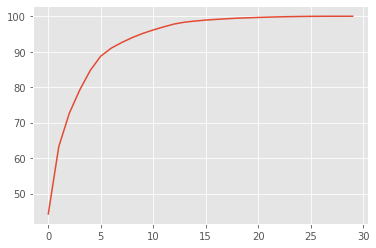

In [193]:
plt.plot(np.cumsum(pca_all.explained_variance_ratio_ * 100));


> To explain 95% of variability 10 components are needed

### Visualize (2d and 3d)

In [194]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

In [195]:
np.cumsum(pca_all.explained_variance_ratio_ * 100)[1]

63.24320765155942

from our previous section: 2 components explain 63% of variability

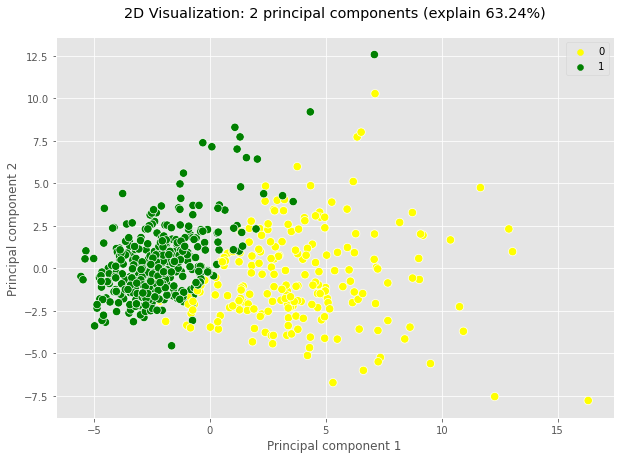

In [196]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], s=70, hue=y, palette=['yellow','green']);
plt.title('2D Visualization: 2 principal components (explain 63.24%)', pad=20)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");


In [197]:
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

In [198]:
np.cumsum(pca_all.explained_variance_ratio_ * 100)[2]

72.6363709089908

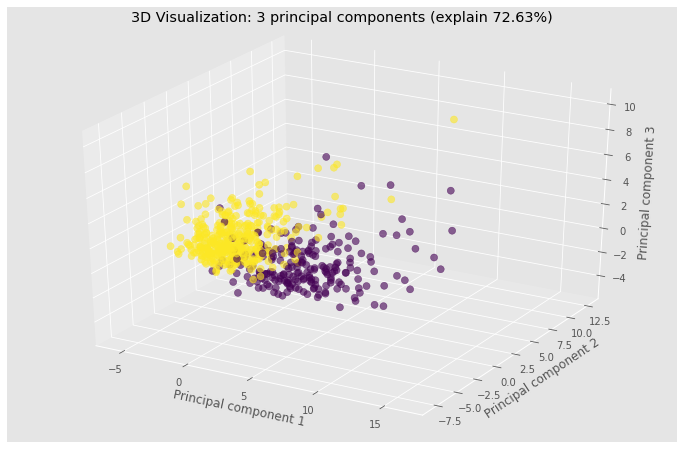

In [199]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=y, s=50, alpha=0.6)
plt.title('3D Visualization: 3 principal components (explain 72.63%)', pad=20)
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_zlabel("Principal component 3");

### Create new df from PCA

In [200]:
# Choose number of the components based on the desired variablity
# For this we need to specify number of components in float, where n-components is the desired variability
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)
X_pca_95.shape

(569, 10)

In [201]:
# The resulting number of component is 10

In [202]:
new_columns = []
for i in range(10):
  new_columns.append('Comp{}'.format(i+1))

In [203]:
df_new = pd.DataFrame(X_pca_95, columns=new_columns)
df_new['label']=y
df_new.head()

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0


## SVD

> This method performs linear dimensionality reduction by means of truncated singular value decomposition (SVD) \
Factorization for SVD is done on the data matrix while factorization for PCA is done on the covariance matrix

For svd default **number of componens** is 2 and the max should be strictly less than the number of features in the original db


### Chose the right number of dimensions

In [204]:
#To get results similar to PCA_all we specify the number of components to 29 (original 30 minus 1)
svd_all = TruncatedSVD(n_components=29, algorithm='randomized',
                   random_state=2020)

X_svd_all = svd_all.fit_transform(X_scaled)

In [205]:
components_explainers(svd_all.explained_variance_ratio_)

Component #1 explains 44.27%
Component #2 explains 18.97%
Component #3 explains 9.39%
Component #4 explains 6.60%
Component #5 explains 5.50%
Component #6 explains 4.02%
Component #7 explains 2.25%
Component #8 explains 1.59%
Component #9 explains 1.39%
Component #10 explains 1.17%
Remaining 19 components explain 4.84%


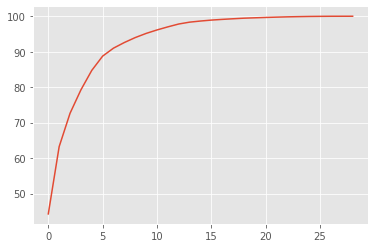

In [206]:
plt.plot(np.cumsum(svd_all.explained_variance_ratio_ * 100));

### Visualize (2d and 3d)

In [207]:
svd_2 = TruncatedSVD(n_components=2, algorithm='randomized', random_state=2020)
svd_2.fit(X_scaled)
X_svd_2 = svd_2.transform(X_scaled)

In [208]:
np.cumsum(svd_2.explained_variance_ratio_ * 100)[1]

63.24320765155938

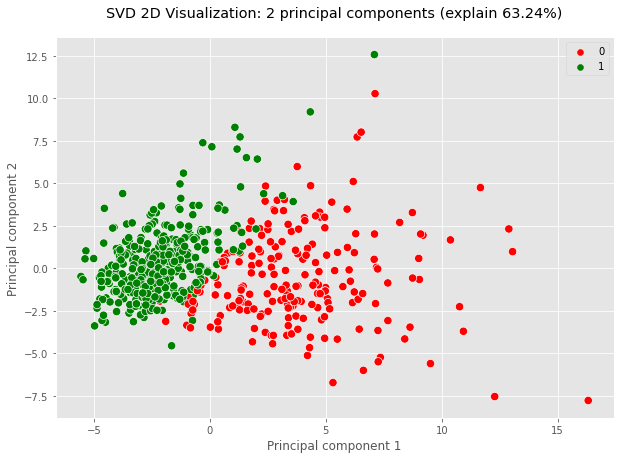

In [209]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_svd_2[:,0], y=X_svd_2[:,1], s=70, hue=y, palette=['red','green']);
plt.title('SVD 2D Visualization: 2 principal components (explain 63.24%)', pad=20)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");

In [210]:
svd_3 = TruncatedSVD(n_components=3, algorithm='randomized', random_state=2020)
svd_3.fit(X_scaled)
X_svd_3 = svd_3.transform(X_scaled)
np.cumsum(svd_3.explained_variance_ratio_ * 100)[2]

72.63637090899056

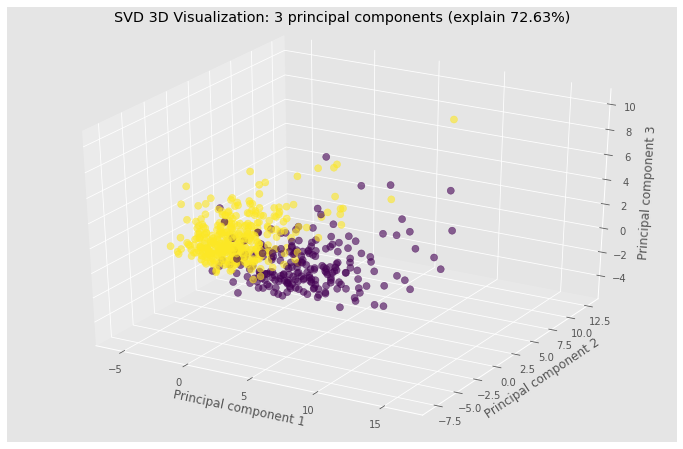

In [211]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_svd_3[:,0], X_svd_3[:,1], X_svd_3[:,2], c=y, s=50, alpha=0.6)
plt.title('SVD 3D Visualization: 3 principal components (explain 72.63%)', pad=20)
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_zlabel("Principal component 3");

## t-SNE

> Non-linear dimensionality reduction method mostly used for data visualization

In [267]:
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

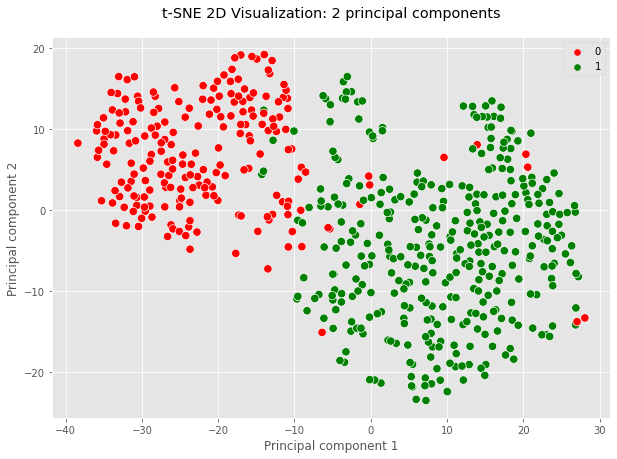

In [268]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], s=70, hue=y, palette=['red','green']);
plt.title('t-SNE 2D Visualization: 2 principal components', pad=20)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");

## ISOMAP

> It connects each instance by calculating the curved or geodesic distance to its nearest neighbors and reduces dimensionality

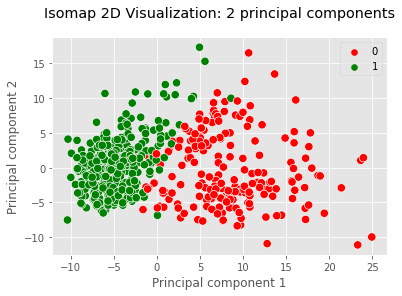

In [270]:
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X_scaled)
sns.scatterplot(x=X_isomap[:,0], y=X_isomap[:,1], s=70, hue=y, palette=['red','green']);
plt.title('Isomap 2D Visualization: 2 principal components', pad=20)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");

## LLE

> The LLE algorithm is an unsupervised method for dimensionality reduction. It tries to reduce these n-Dimensions while trying to preserve the geometric features of the original non-linear feature structure.

In [302]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)

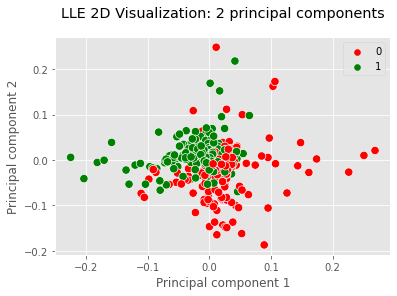

In [303]:
sns.scatterplot(x=X_lle[:,0], y=X_lle[:,1], s=70, hue=y, palette=['red','green']);
plt.title('LLE 2D Visualization: 2 principal components', pad=20)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");

## UMAP

> UMAP is a new technique by McInnes et al. that offers a number of advantages over t-SNE, most notably increased speed and better preservation of the data's global structure.

In [321]:
umap_model = umap.UMAP()
X_umap = umap_model.fit_transform(X_pca_all)

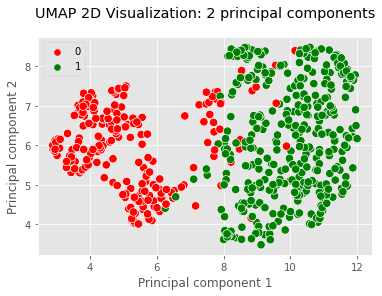

In [322]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=70, hue=y, palette=['red','green']);
plt.title('UMAP 2D Visualization: 2 principal components', pad=20)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");

In [332]:
umap_model2 = umap.UMAP(n_neighbors=10,
                      min_dist=0.2,
                      metric='correlation')
X_umap2 = umap_model2.fit(X_pca_all)

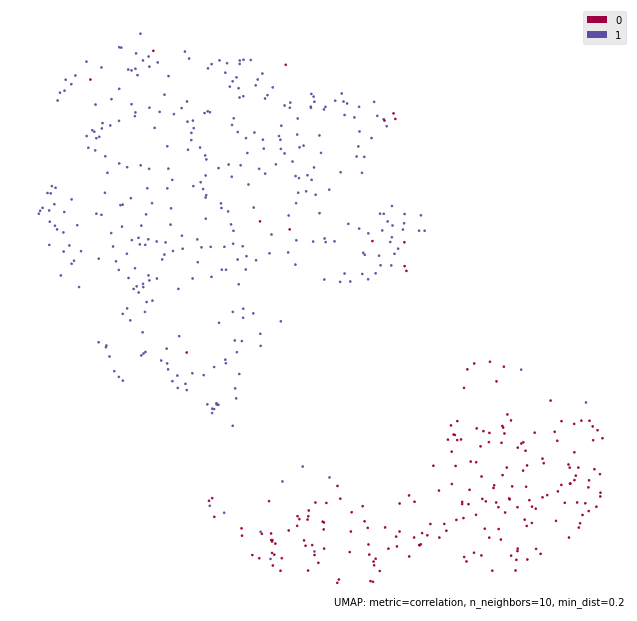

In [334]:
umap.plot.points(X_umap2, labels=y);

# IMAGE DATA SET
Dataset: MNIST numbers

In [166]:
from sklearn.datasets import fetch_openml
db_img = fetch_openml(data_id=41082)
db_img.details

{'default_target_attribute': 'int0',
 'description_version': '1',
 'file_id': '19329737',
 'format': 'ARFF',
 'id': '41082',
 'licence': 'CC0',
 'md5_checksum': 'fdd9239e4d7bc2c12ef6e3ac4d6b3e6b',
 'name': 'USPS',
 'processing_date': '2018-10-04 07:29:18',
 'status': 'active',
 'tag': 'vision',
 'upload_date': '2018-05-14T17:07:23',
 'url': 'https://www.openml.org/data/v1/download/19329737/USPS.arff',
 'version': '2',
 'visibility': 'public'}

In [167]:
df_img=pd.DataFrame(data=db_img.data, columns=db_img.feature_names)

In [168]:
df_img.head()

,double1,double2,double3,double4,double5,double6,double7,double8,double9,double10,double11,double12,double13,double14,double15,double16,double17,double18,double19,double20,double21,double22,double23,double24,double25,double26,double27,double28,double29,double30,double31,double32,double33,double34,double35,double36,double37,double38,double39,double40,...,double217,double218,double219,double220,double221,double222,double223,double224,double225,double226,double227,double228,double229,double230,double231,double232,double233,double234,double235,double236,double237,double238,double239,double240,double241,double242,double243,double244,double245,double246,double247,double248,double249,double250,double251,double252,double253,double254,double255,double256
0,-1.000000,-1.000000,-1.000000,-0.999997,-0.999729,-0.989537,-0.860165,-0.395924,0.048299,-0.282151,-0.816919,-0.988564,-0.999869,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-0.999891,-0.996208,-0.942840,-0.612719,0.130807,0.512043,-0.042048,-0.757812,-0.984880,-0.999826,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999966,-0.998204,-0.967391,-0.759299,-0.157237,0.547667,...,0.846234,0.887277,0.870540,0.629770,0.002161,-0.690421,-0.962489,-0.998341,-0.997299,-0.955973,-0.744837,-0.252525,0.311654,0.633319,0.801415,0.902149,0.919526,0.819451,0.558884,0.049978,-0.565535,-0.912456,-0.993863,-0.999857,-0.999840,-0.995876,-0.957685,-0.814635,-0.547725,-0.214728,0.131298,0.384728,0.433073,0.193397,-0.237439,-0.649848,-0.906359,-0.988672,-0.999475,-0.999994
1,-0.999927,-0.993644,-0.900309,-0.632621,-0.443145,-0.454436,-0.474872,-0.431176,-0.494539,-0.583648,-0.568653,-0.400266,-0.155455,-0.086001,-0.369077,-0.822611,-0.999842,-0.986289,-0.782169,-0.156450,0.395208,0.493870,0.475800,0.523358,0.455069,0.354274,0.363338,0.499252,0.647218,0.607744,0.110684,-0.679707,-0.999892,-0.990451,-0.837409,-0.218319,0.631773,0.919566,0.929364,0.925532,...,0.532547,0.513450,0.548801,0.655777,0.789453,0.890432,0.678962,-0.031372,-0.904029,-0.712320,-0.436572,-0.130600,0.165739,0.407183,0.546841,0.611068,0.717344,0.835281,0.847769,0.774506,0.697669,0.558652,0.170055,-0.514394,-0.993681,-0.972657,-0.912256,-0.801429,-0.663504,-0.509438,-0.388084,-0.273639,0.001094,0.294825,0.316915,0.113494,-0.092331,-0.329390,-0.584681,-0.868793
2,-1.000000,-1.000000,-1.000000,-0.999995,-0.999986,-0.999987,-0.999990,-0.999316,-0.976299,-0.725917,-0.109680,0.075605,-0.429609,-0.875416,-0.992571,-0.999916,-1.000000,-0.999999,-0.999967,-0.999533,-0.998598,-0.998750,-0.999612,-0.997639,-0.943592,-0.517795,0.292633,0.209344,-0.513987,-0.917302,-0.995524,-0.999950,-1.000000,-0.999975,-0.998992,-0.987832,-0.965102,-0.970052,-0.991423,-0.994759,...,-0.549137,0.007506,0.602554,0.278314,-0.623000,-0.972920,-0.999475,-0.999995,-1.000000,-1.000000,-1.000000,-0.999992,-0.999797,-0.997726,-0.991396,-0.971292,-0.761473,-0.073167,0.522703,0.127308,-0.688979,-0.980098,-0.999768,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999998,-0.999975,-0.999778,-0.988816,-0.821857,-0.277379,0.136501,-0.247816,-0.809498,-0.988116,-0.999864,-1.000000
3,-0.999998,-0.999800,-0.994136,-0.932288,-0.673685,-0.192056,0.218820,0.337224,0.193371,-0.065072,-0.362699,-0.634716,-0.830269,-0.952963,-0.994496,-0.999760,-0.999969,-0.997248,-0.948333,-0.680445,-0.096799,0.384204,0.446062,0.400219,0.442093,0.485947,0.438039,0.169868,-0.268995,-0.735113,-0.956490,-0.997672,-0.999846,-0.988661,-0.819830,-0.228448,0.411286,0.334013,-0.229287,-0.473654,...,0.318691,-0.564093,-0.954832,-0.998322,-0.999984,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999894,-0.990602,-0.839672,-0.229119,0.532742,0.317457,-0.590122,-0.965631,-0.999071,-0.999992,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999909,-0.991943,-0.864492,-0.373861,0.196530,0.002823,-0.695900,-0.976372,-0.999458,-0.999996,-1.000000,-1.000000,-1.000000
4,-1.000000,-0.999971,-0.997452,-0.957499,-0.801681,-0.510623,-0.107965,0.217262,0.216431,-0.008529,-0.4

In [159]:
X_img = df_img.values
y_img = db_img.target

In [291]:
y_img = y_img.astype(np.int)

In [144]:
X_img.shape

(9298, 256)

In [171]:
X_img_scaled = MinMaxScaler().fit_transform(X_img)

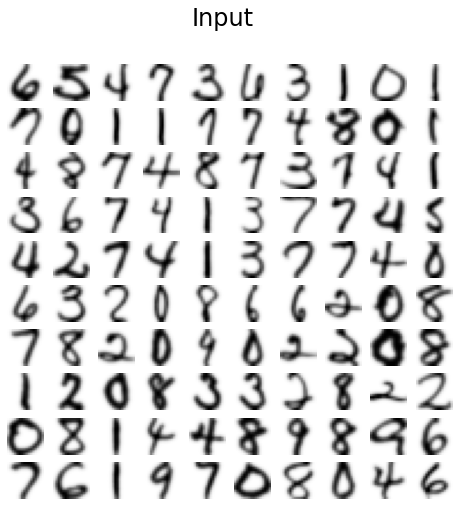

In [184]:
plot_digits(X_img_scaled, "Input")

## PCA

### Chose the right number of dimensions

In [279]:
pca_img_all = PCA(random_state=2020)
pca_img_all.fit(X_img_scaled)
X_img_pca_all = pca_img_all.transform(X_img_scaled)

In [280]:
components_explainers(pca_img_all.explained_variance_ratio_)

Component #1 explains 24.60%
Component #2 explains 10.71%
Component #3 explains 8.59%
Component #4 explains 6.83%
Component #5 explains 6.13%
Component #6 explains 4.86%
Component #7 explains 3.89%
Component #8 explains 3.25%
Component #9 explains 2.90%
Component #10 explains 2.55%
Component #11 explains 2.25%
Component #12 explains 1.96%
Component #13 explains 1.59%
Component #14 explains 1.42%
Component #15 explains 1.32%
Component #16 explains 1.22%
Component #17 explains 1.18%
Component #18 explains 1.00%
Remaining 238 components explain 13.74%


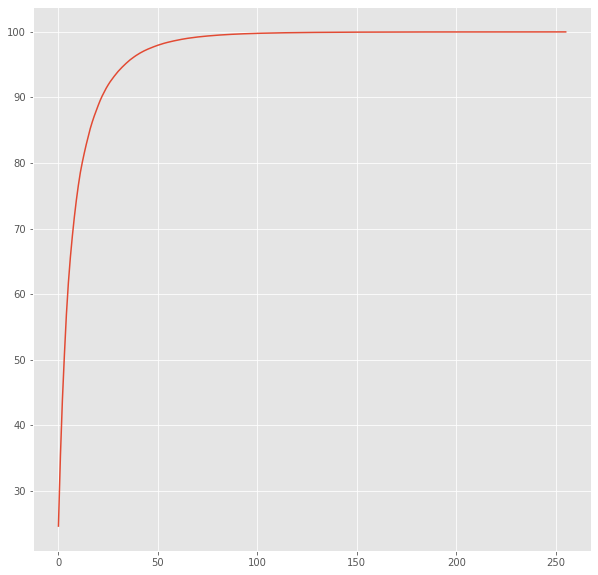

In [281]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca_img_all.explained_variance_ratio_ * 100))
plt.show()

In [282]:
# Choose number of the components based on the desired variablity
# For this we need to specify number of components in float, where n-components is the desired variability
pca_img_95 = PCA(n_components=0.95, random_state=2020)
pca_img_95.fit(X_img_scaled)
X_img_pca_95 = pca_img_95.transform(X_img_scaled)
X_img_pca_95.shape

(9298, 35)

35 features preserve 95% of dataset variance

### PCA for Compression

In [283]:
X_img_recovered = pca_img_95.inverse_transform(X_img_pca_95)

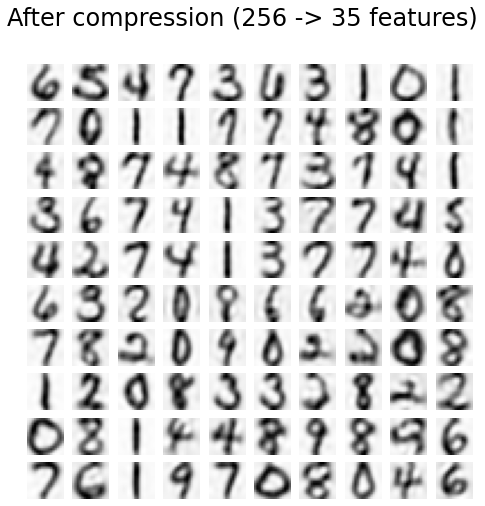

In [284]:
plot_digits(X_img_recovered, "After compression (256 -> 35 features)")

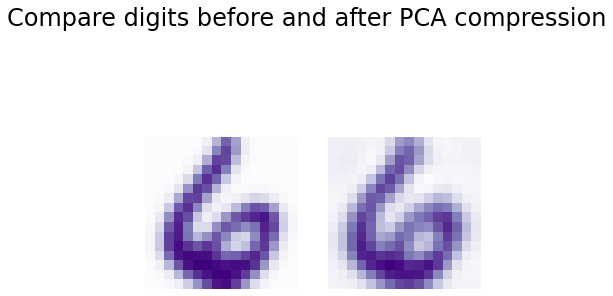

In [285]:
compare_digits([X_img_scaled[0], X_img_recovered[0]], "Compare digits before and after PCA compression")

## SDV

### Chose the right number of dimensions

In [245]:
svd_img_all = TruncatedSVD(n_components=255, algorithm='randomized', n_iter=10,
                   random_state=2020)
X_svd_img_all = svd_img_all.fit_transform(X_img_scaled)

In [246]:
components_explainers(svd_img_all.explained_variance_ratio_)

Component #1 explains 13.61%
Component #2 explains 18.48%
Component #3 explains 10.71%
Component #4 explains 6.83%
Component #5 explains 6.64%
Component #6 explains 5.02%
Component #7 explains 3.89%
Component #8 explains 3.28%
Component #9 explains 2.93%
Component #10 explains 2.57%
Component #11 explains 2.34%
Component #12 explains 2.12%
Component #13 explains 1.59%
Component #14 explains 1.42%
Component #15 explains 1.33%
Component #16 explains 1.22%
Component #17 explains 1.18%
Component #18 explains 1.00%
Remaining 237 components explain 13.82%


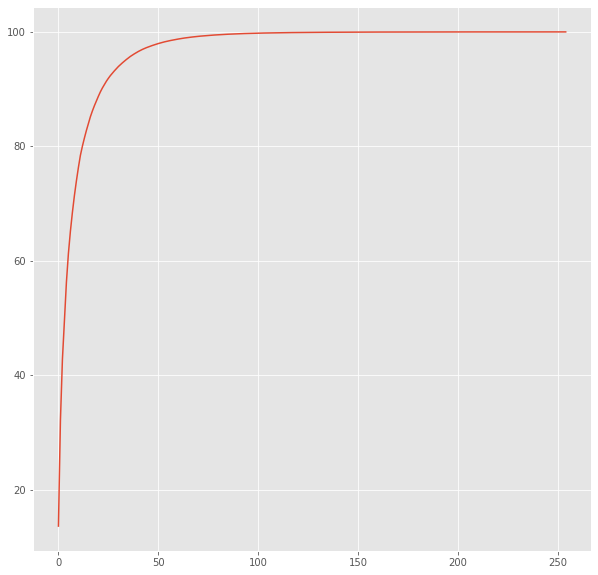

In [247]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(svd_img_all.explained_variance_ratio_ * 100))
plt.show()

In [254]:
number_of_components = svd_95(np.cumsum(svd_img_all.explained_variance_ratio_))
number_of_components

35

35 features preserve 95% of dataset variance

### SVD for Compression

In [255]:
svd_img_95 = TruncatedSVD(n_components=35, algorithm='randomized', n_iter=10,
                   random_state=2020)
svd_img_95.fit(X_img_scaled)
X_svd_img_95 = svd_img_95.transform(X_img_scaled)
X_svd_img_95.shape

(9298, 35)

In [256]:
X_img_svd_recovered = svd_img_95.inverse_transform(X_svd_img_95)

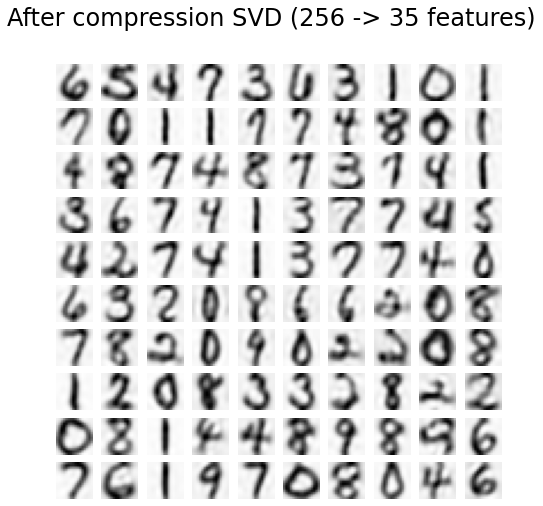

In [258]:
plot_digits(X_img_svd_recovered, "After compression SVD (256 -> 35 features)")

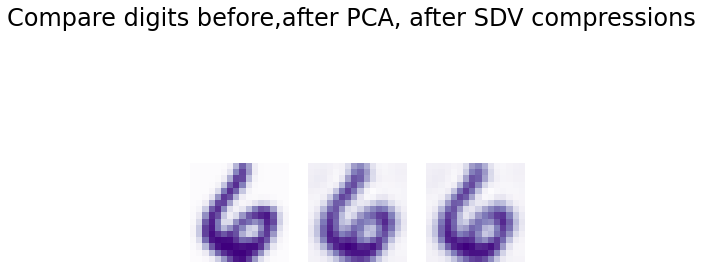

In [266]:
compare_digits([X_img_scaled[0], X_img_recovered[0], X_img_svd_recovered[0]], "Compare digits before,after PCA, after SDV compressions")

## t-SNE

In [300]:
tsne_img = TSNE(n_components=2)
X_img_tsne = tsne_img.fit_transform(X_img_pca_all)

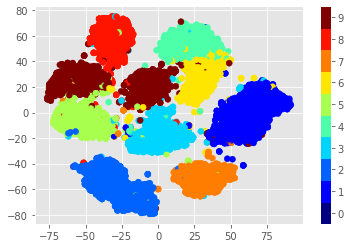

In [301]:
plt.scatter(X_img_tsne[:,0], X_img_tsne[:,1], c=y_img, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

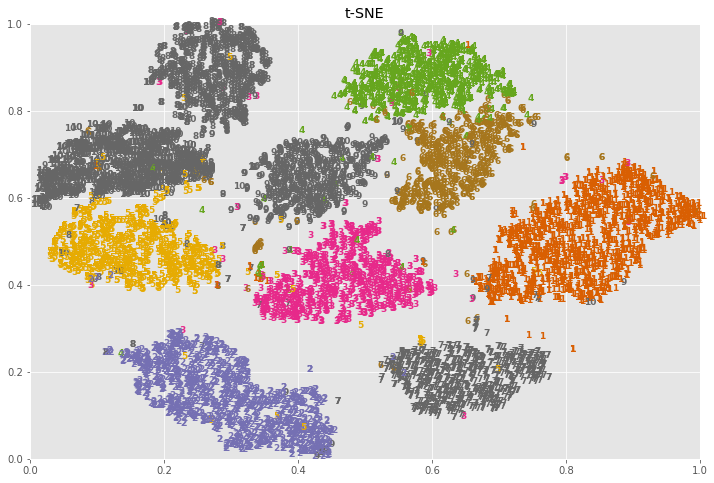

In [312]:
plot_embedding(X_img_tsne, "t-SNE", y_img)

## ISOMAP

In [304]:
isomap_img = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_img_isomap = isomap.fit_transform(X_img)

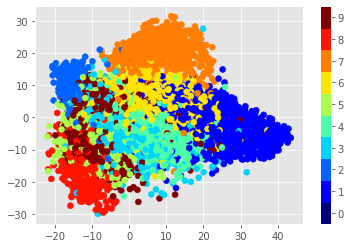

In [305]:
plt.scatter(X_img_isomap[:,0], X_img_isomap[:,1], c=y_img, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

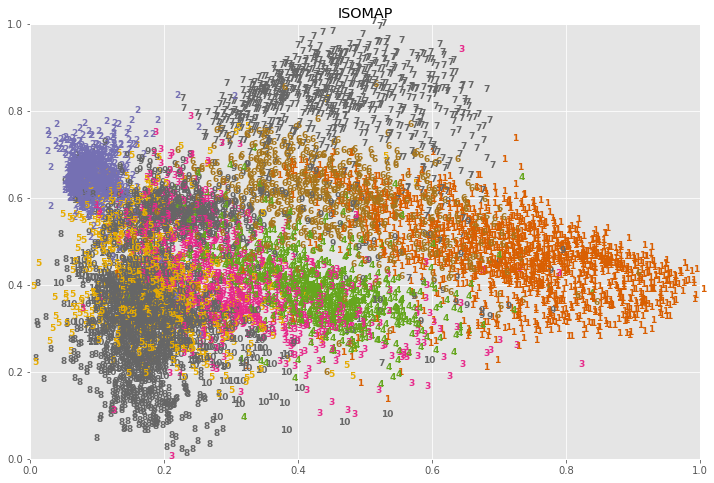

In [313]:
plot_embedding(X_img_isomap, "ISOMAP", y_img)

## LLE

In [306]:
lle_img = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_img_lle = lle_img.fit_transform(X_img)

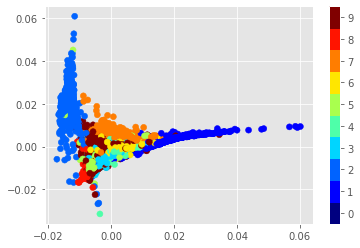

In [307]:
plt.scatter(X_img_lle[:,0], X_img_lle[:,1], c=y_img, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

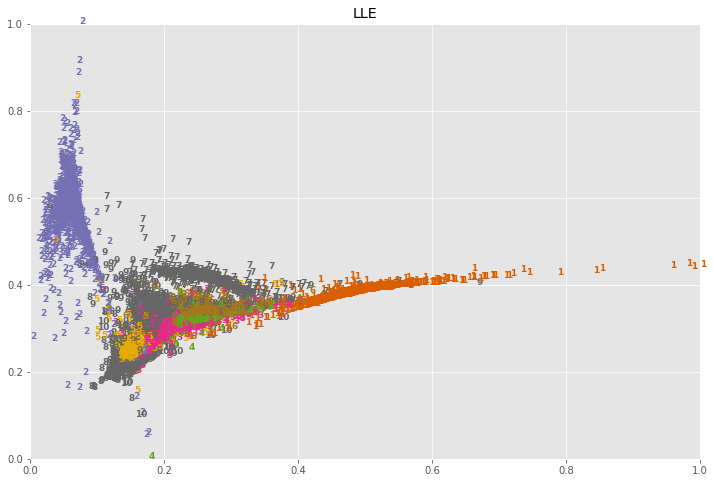

In [311]:
plot_embedding(X_img_lle, "LLE", y_img)

## UMAP

In [317]:
umap_op = umap.UMAP()

In [318]:
X_img_umap = umap_op.fit_transform(X_img_pca_all)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


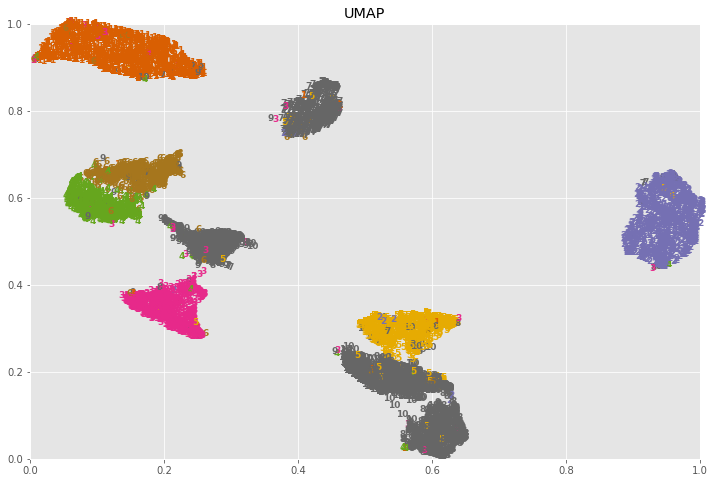

In [319]:
plot_embedding(X_img_umap, "UMAP", y_img)

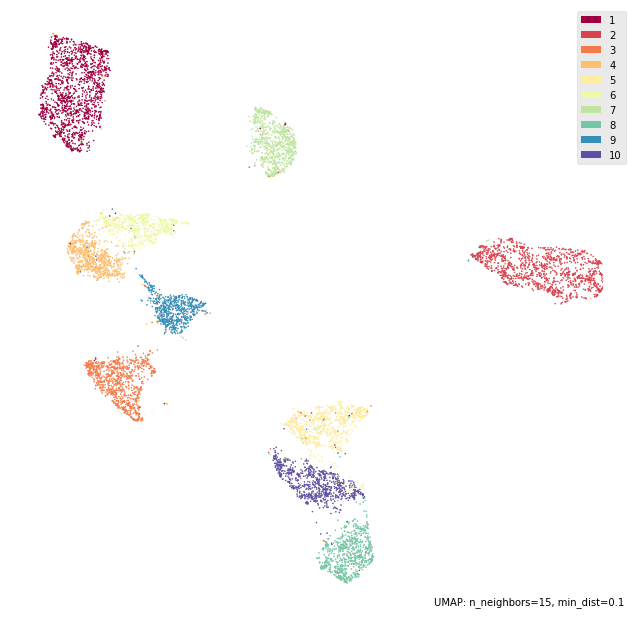

In [328]:
umap.plot.points(umap_op.fit(X_img_pca_all), labels=y_img);

# References

1. [Principal Component Analysis (PCA) with Scikit-learn](https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0)
1. [11 Dimensionality reduction techniques you should know in 2021](https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b)
1. [Image denoising using kernel PCA](https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html#sphx-glr-auto-examples-applications-plot-digits-denoising-py)
1. [Locally Linear Embedding (LLE) | Data Mining and Machine Learning](https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9)
1. [Understanding UMAP](https://pair-code.github.io/understanding-umap/)